# Feature Scaling

## What is Feature Scaling?

> Feature Scaling is the process of bringing all of our features to the same or very similar ranges of values or distribution. — **Machine Learning Engineering by Andriy Burkov** [URL](http://mlebook.com/)

## Why do we need Feature Scaling?

- Most of the Machine Learning Algorithms show `significantly better results` when the features are transformed into the same or very similar range, `i.e. a fixed scale`.

- To understand the importance of feature scaling, we are going to use the `diabetes` dataset from the [Source](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

- Here we are considering a problem of estimating a quantitative measure of diabetes disease progression one year after baseline using the ten baseline variables, `age`, `sex`, `body mass index`, `average blood pressure`, and six `blood serum measurements`.

- **Dataset Description**
    - `age`: age in years
    - `sex` : gender
    - `bmi`: body mass index
    - `bp`: average blood pressure
    - `s1`: tc, total serum cholesterol
    - `s2`: ldl, low-density lipoproteins
    - `s3`: hdl, high-density lipoproteins
    - `s4`: tch, total cholesterol / HDL
    - `s5`: ltg, possibly log of serum triglycerides level
    - `s6`: glu, blood sugar level
    - `target`: a quantitative measure of diabetes disease progression one year after baseline

### Import Necessary Packages

In [1]:
# Import Necessary Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler

### Dataset Description

In [2]:
# Load the Dataset
X, targets = load_diabetes(
    return_X_y=True, # Return Input Features and Target
    as_frame=True, # Return Input Features and Target as Pandas Dataframe
    scaled=False # Return Input Features and Target is NOT Scaled
)
print(f"The input features are of type {type(X)}")
print(f"The target is of type {type(targets)}")

The input features are of type <class 'pandas.core.frame.DataFrame'>
The target is of type <class 'pandas.core.series.Series'>


In [3]:
# Check a Sample from the Dataset
X.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.00,4.2905,80.0
5,23.0,1.0,22.6,89.0,139.0,64.8,61.0,2.00,4.1897,68.0
6,36.0,2.0,22.0,90.0,160.0,99.6,50.0,3.00,3.9512,82.0
7,66.0,2.0,26.2,114.0,255.0,185.0,56.0,4.55,4.2485,92.0
8,60.0,2.0,32.1,83.0,179.0,119.4,42.0,4.00,4.4773,94.0
9,29.0,1.0,30.0,85.0,180.0,93.4,43.0,4.00,5.3845,88.0


In [4]:
# Check Descriptive Statistics of the Dataset
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,48.518100,13.109028,19.0000,38.2500,50.00000,59.0000,79.000
sex,442.0,1.468326,0.499561,1.0000,1.0000,1.00000,2.0000,2.000
bmi,442.0,26.375792,4.418122,18.0000,23.2000,25.70000,29.2750,42.200
bp,442.0,94.647014,13.831283,62.0000,84.0000,93.00000,105.0000,133.000
s1,442.0,189.140271,34.608052,97.0000,164.2500,186.00000,209.7500,301.000
s2,442.0,115.439140,30.413081,41.6000,96.0500,113.00000,134.5000,242.400
s3,442.0,49.788462,12.934202,22.0000,40.2500,48.00000,57.7500,99.000
s4,442.0,4.070249,1.290450,2.0000,3.0000,4.00000,5.0000,9.090
s5,442.0,4.641411,0.522391,3.2581,4.2767,4.62005,4.9972,6.107
s6,442.0,91.260181,11.496335,58.0000,83.2500,91.00000,98.0000,124.000


In [5]:
list(X['age'][0:10])

[59.0, 48.0, 72.0, 24.0, 50.0, 23.0, 36.0, 66.0, 60.0, 29.0]

- Few observations from the descriptive statistics
    - The `age` feature is in range [18, 79], indicating patients ranging from 18 to 79 years old. 
    - The `bmi` feature is in range [18, 42], indicating patients with body mass index of 18 to 42.
    - The `s1` feature is in range [97, 301], indicating patients with total serum cholesterol of 97 to 301.
    - ...
- As we can see here, every feature has a different range. 
- When we use these features to build a Machine Learning model, the learning algorithm won’t differentiate that values 18-79 and 97-301 represent two different things `age` and `s1-total serum cholesterol`. It will end up treating them both as numbers. 
- As the numbers for total serum cholesterol i.e. 97-301 are much bigger in value compared to the numbers representing the age, the learning algorithm might end up giving more importance to total serum cholesterol over the age, `regardless of which variable is actually more helpful` in generating predictions. 
- **To avoid such an issue we prefer to transform the features into the same or very similar range, `i.e. a fixed scale`.**

## Different Types of Feature Scaling

- **`Normalization (Min-Max Scaling)`** and **`Standardization (Standard Scaling)`** are the two of the most widely used methods for feature scaling. 
- Normalization transforms each feature to a range of [0 - 1]. On the other hand, standardization scales each input variable by subtracting the mean and dividing by the standard deviation, resulting in a distribution (almost!) with a mean of zero and a standard deviation of one. 

### Normalization

Let's consider a sample from our dataset with $age = \{59.0, 48.0, 72.0, 24.0, 50.0, 23.0, 36.0, 66.0, 60.0, 29.0\}$. We can use following equation to Normalize the data. After Normalization, our sample transformed to $age = \{0.73, 0.51, 1.0, 0.02, 0.55, 0.0, 0.27, 0.88, 0.76, 0.12\}$. 

$$s' = \frac{s - \min(S)}{\max(S) - \min(S)} $$

In [6]:
age_sample = list(X['age'][:10])
normalized_age = [((age - min(age_sample))/(max(age_sample) - min(age_sample))) for age in age_sample]
normalized_age = [round(age, 2) for age in normalized_age]
print(f"First 10 Age Values before Normalization: {age_sample}")
print(f"First 10 Age Values after Normalization: {normalized_age}")

First 10 Age Values before Normalization: [59.0, 48.0, 72.0, 24.0, 50.0, 23.0, 36.0, 66.0, 60.0, 29.0]
First 10 Age Values after Normalization: [0.73, 0.51, 1.0, 0.02, 0.55, 0.0, 0.27, 0.88, 0.76, 0.12]


- In this example, we can see that the data point with 72 years of age is scaled to 1.0 as 72 is the maximum number out of those 10 samples of age from our dataset. Similarly data point with 23 years of age is scaled to 0.0 as 23 is the minimum number out of those 10 samples of age from our dataset. 
- Here key point to observe is that the scaling operation is executed based on the minimum and maximum of those 10 samples and not all the samples of the dataset.

- Instead of the range $[0, 1]$, if we are interested to transform in some arbitrary range $[a, b]$ we can use following equation to Normalize the data.

$$s' = a + \frac{\big(s - \min(S)\big) \big(b - a\big)}{\max(S) - \min(S)} 

For example, we can transform $age = \{59.0, 48.0, 72.0, 24.0, 50.0, 23.0, 36.0, 66.0, 60.0, 29.0\}$ in the range $[-1, 1]$ to get scaled dataset $age = \{0.47, 0.02, 1.0, -0.96, 0.1, -1.0, -0.47, 0.76, 0.51, -0.76\}$.

In [7]:
a, b = -1, 1
age_sample = list(X['age'][:10])
normalized_age = []
for age in age_sample:
    numerator = (age - min(age_sample))*(b - a)
    denominator = max(age_sample) - min(age_sample)
    normalized_age.append(a + (numerator/denominator))
normalized_age = [round(a, 2) for a in normalized_age]
print(f"First 10 Age Values before Normalization: {age_sample}")
print(f"First 10 Age Values after Normalization: {normalized_age}")

First 10 Age Values before Normalization: [59.0, 48.0, 72.0, 24.0, 50.0, 23.0, 36.0, 66.0, 60.0, 29.0]
First 10 Age Values after Normalization: [0.47, 0.02, 1.0, -0.96, 0.1, -1.0, -0.47, 0.76, 0.51, -0.76]


- In this example, we can see that the data point with 72 years of age is scaled to 1.0 as 72 is the maximum number out of those 10 samples of age from our dataset. Similarly data point with 23 years of age is scaled to -1.0 as 23 is the minimum number out of those 10 samples of age from our dataset. 
- Here key point to observe is that the scaling operation is executed based on the minimum and maximum of those 10 samples and not all the samples of the dataset.

### Standardization

Let's consider a sample from our dataset with $age = \{59.0, 48.0, 72.0, 24.0, 50.0, 23.0, 36.0, 66.0, 60.0, 29.0\}$. We can use following equation to Standardize the data. After Standardization, our sample transformed to $age = \{0.73, 0.08, 1.5, -1.34, 0.2, -1.4, -0.63, 1.14, 0.79, -1.05\}$. 

$$s' = \frac{s - mean(S)}{std(S)}$$

In [8]:
age_sample = list(X['age'][:10])
standardize_age = [((age - np.average(age_sample))/np.std(age_sample)) for age in age_sample]
standardize_age = [round(age, 2) for age in standardize_age]
print(f"First 10 Age Values before Standardization: {age_sample}")
print(f"First 10 Age Values after Standardization: {standardize_age}")

First 10 Age Values before Standardization: [59.0, 48.0, 72.0, 24.0, 50.0, 23.0, 36.0, 66.0, 60.0, 29.0]
First 10 Age Values after Standardization: [0.73, 0.08, 1.5, -1.34, 0.2, -1.4, -0.63, 1.14, 0.79, -1.05]


### Robust Scaling

- Standardization scales the data such that the mean of values after scaling becomes zero and the standard deviation of values after scaling becomes one. This way it transforms the data such that it follows the `standard normal distribution`. 
- It uses `mean` and `standard deviation` of original data to perform scaling. Usually Mean and Standard Deviation is very sensitive to **`outliers`**.

> **`outliers`**. are the values on the edge of the distribution that may have a low probability of occurrence, yet are overrepresented for some reason. Outliers can skew a probability distribution and make data scaling using standardization difficult as the calculated mean and standard deviation will be skewed by the presence of the outliers. $-$ Jason Brownlee from Machine Learning Mastery [URL](https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/).

- `Meadian` i.e. `50th Percentile` is less sensitive to outliers and similarly `Inter-Quartile Range (IQR)` i.e. `IQR = (75th Percentile - 25th Percentile)` is also less sensitive to outliers. 
- Robust Scaling uses Median and IQR to scale the data.

$$s' = \frac{s - median(S)}{IQR(S)}$$

Let's consider a sample from our dataset with $age = \{59.0, 48.0, 72.0, 24.0, 50.0, 23.0, 36.0, 66.0, 60.0, 29.0, 8.0, 10.0, 5.0\}$. We can use the above equation to scale the data. After scaling, our sample transformed to $age = \{0.64, 0.33, 1.0, -0.33, 0.39, -0.36, 0.0, 0.83, 0.67, -0.19, -0.78, -0.72, -0.86\}$. 

Here the key point to observe is that we have purposefully added three some outlier samples (8.0, 10.0, and 5.0)  in the `age` feature.

In [11]:
age_sample = list(X['age'][:10])
age_sample.extend([8.0, 10.0, 5.0])
IQR = np.subtract(*np.percentile(age_sample, [75, 25]))
robust_scaled_age = [((age - np.median(age_sample))/IQR) for age in age_sample]
robust_scaled_age = [round(age, 2) for age in robust_scaled_age]
print(f"First 10 Age Values before Robust Scaling: {age_sample}")
print(f"First 10 Age Values after Robust Scaling: {robust_scaled_age}")

First 10 Age Values before Robust Scaling: [59.0, 48.0, 72.0, 24.0, 50.0, 23.0, 36.0, 66.0, 60.0, 29.0, 8.0, 10.0, 5.0]
First 10 Age Values after Robust Scaling: [0.64, 0.33, 1.0, -0.33, 0.39, -0.36, 0.0, 0.83, 0.67, -0.19, -0.78, -0.72, -0.86]


## How to Choose Scaling Type?

Even though there are no fix rules for selecting scaler, broadly the Selection depends on `Outliers` and `Understanding of Features`.

The selection of feature scaling depends on couple of factors:

1. **Understanding of Features**
    - There some features where `Min` and `Max` values from the dataset might not correspond to the actual possible `Min` and `Max` values for a feature. From statistical perspective, `Min` and `Max` of sample doesn't always define the `Min` and `Max` of population. In such cases, `Standardization` or `RobustScaling` would be a better choice over `Normalization`. 
    
    - For example, in our dataset, the minimum `age` is 19 years. We are intending to use this dataset to build a model which can predict a quantitative measure of diabetes disease progression one year after baseline. If we use `Normalization` for scaling, we are assuming that we will always receive patients aged 19 years or older. In future, if we receive a patient who is younger than the 19 years, the scaled `age` value for that patient will be a negative number and doesn't align with the original idea of scaling `age` in range [0, 1]. 

    - This can negatively impact the predictions of the model as model has never seen a data sample with negative age value during training process. 
    
    - Similarly, the maximum `age` in our dataset is 79 years. If we receive a patient who is older than the 79 years, the scaled `age` value for that patient will be a greater than 1 which doesn't align with the original idea of scaling `age` in range [0, 1]. 
    
    - 



If you don't have heavy `Outliers` in data, StandardScaler or MinMaxScaler could be used based on the `understanding of feature in real world`.

1. There are some data where `Min` and `Max` value of the dataset doesn't correspond to the `Min` and `Max` value of real world data. For example `house price` : even though the dataset min is 300K $, it doesn't mean that in market there can not be a house lower than 300K. For such cases, Standard scaler is used.
2. There are some data where `Min` and `Max` values are fix. For example Images stored in computer : Images are stored as `uint8` data type so it can have Min value of 0 and Max value of 255. In this case MinMax scaler is a better choice over StandardScaler.

## Impact of Scaling

In this section we will compare different types 

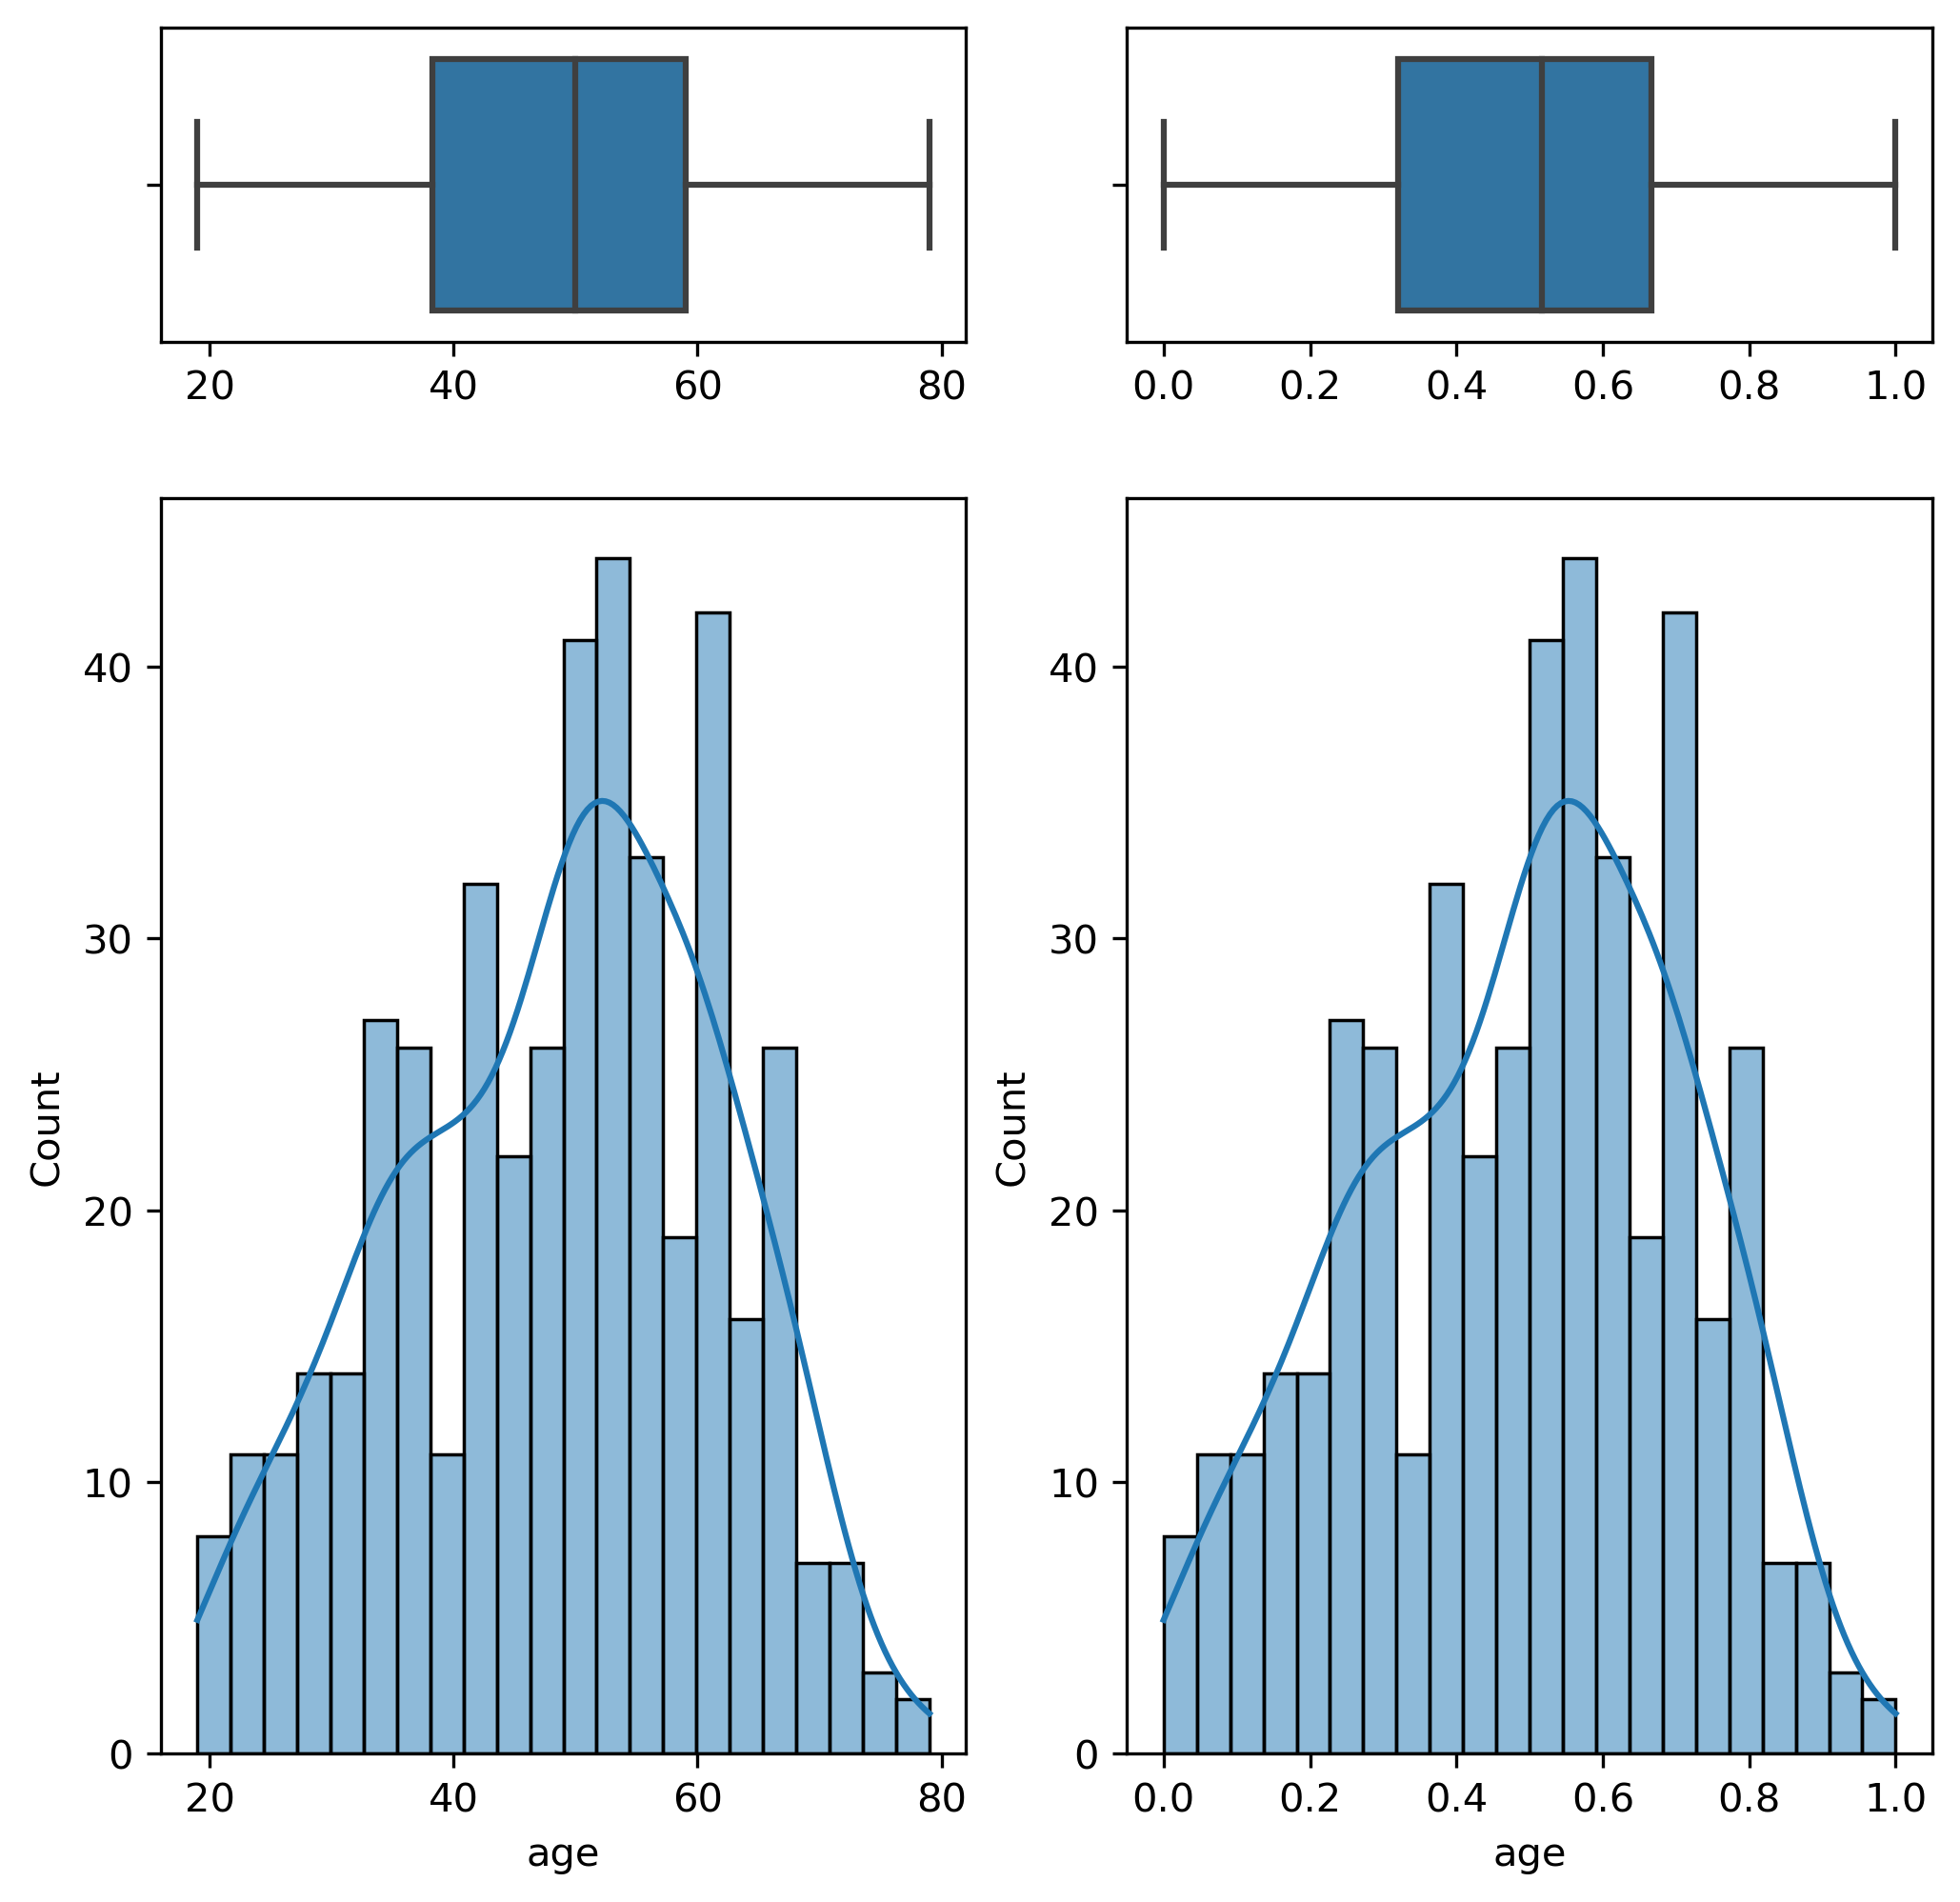

In [10]:
normalization_scaler = MinMaxScaler()
normalized_X = pd.DataFrame(normalization_scaler.fit_transform(X), columns=X.columns)

fig, axs = plt.subplots(
        nrows=2,
        ncols=2,
        figsize=(8, 8),
        gridspec_kw={"height_ratios": (.20, .80)},
        dpi=300,
        constrained_layout=False
)

sns.boxplot(data=X, x='age', ax=axs[0][0])
sns.histplot(data=X, x='age', ax=axs[1][0], kde=True, bins='sqrt')

sns.boxplot(data=normalized_X, x='age', ax=axs[0][1])
sns.histplot(data=normalized_X, x='age', ax=axs[1][1], kde=True, bins='sqrt')

axs[0][0].set(xlabel='')
axs[0][0].set_facecolor('white')
axs[1][0].set_facecolor('white')

axs[0][1].set(xlabel='')
axs[0][1].set_facecolor('white')
axs[1][1].set_facecolor('white')